In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('mobile_phone_data.csv',delimiter=";")

In [20]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,FALSE,2.2,0,1,0,7,0.6,188.0,2,...,20.0,756.0,2549,9,7,19,0,0,True,600
1,1021,TRUE,0.5,1,0,1,53,0.7,136.0,3,...,905.0,1988.0,2631,17,3,7,1,1,False,823
2,563,TRUE,0.5,1,2,1,41,0.9,145.0,5,...,1263.0,1716.0,2603,11,2,9,1,1,False,849
3,615,TRUE,2.5,0,0,0,10,0.8,131.0,6,...,1216.0,1786.0,2769,16,8,11,1,0,False,802
4,1821,TRUE,1.2,0,13,1,44,0.6,141.0,2,...,1208.0,1212.0,1411,8,2,15,1,1,False,584


Preprocessing Data

In [21]:
df.shape

(2000, 21)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           1977 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      1994 non-null   float64
 9   n_cores        2000 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      1986 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            2000 non-null   object 
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [23]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
for i in df.columns:
  print(df[i].value_counts())

battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64
blue
FALSE    996
TRUE     980
-          1
Name: count, dtype: int64
clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: count, dtype: int64
dual_sim
1    1019
0     981
Name: count, dtype: int64
fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64
four_g
1    1043
0     957
Name: count, dtype: int64
int_memory
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59  

Check Null Value for Each Columns

In [25]:
df['blue'].isnull().values.sum()

23

In [26]:
df['mobile_wt'].isnull().values.sum()

6

In [27]:
df['px_height'].isnull().values.sum()

14

In [28]:
df['px_width'].isnull().values.sum()

2

In [29]:
print(df.isnull().sum())

battery_power     0
blue             23
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep             0
mobile_wt         6
n_cores           0
pc                0
px_height        14
px_width          2
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64


In [16]:
#convert string to integer
df['ram'].astype(str).astype(int)

0       2549
1       2631
2       2603
3       2769
4       1411
        ... 
1995     668
1996    2032
1997    3057
1998     869
1999    3919
Name: ram, Length: 2000, dtype: int32

In [30]:
df[df['ram']=='4GB']

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1099,1697,FALSE,0.5,0,0,1,60,0.1,90.0,4,...,88.0,1046.0,4GB,15,1,11,1,1,False,271


In [31]:
df['ram'].replace('4GB',4, inplace=True)

In [32]:
#convert string to integer
df['ram']=df['ram'].astype(str).astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           1977 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      1994 non-null   float64
 9   n_cores        2000 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      1986 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            2000 non-null   int32  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Standarize Data

In [34]:
#Replace non standard value into standard value
i=df[df['blue']=='-'].index
df=df.drop(i,axis=0)
df = df.reset_index(drop=True)
df['n_cores'].replace('three','3', inplace=True)

In [35]:
df.shape

(1999, 21)

In [36]:
df['n_cores'].value_counts()

n_cores
4    274
7    259
8    256
2    247
3    246
5    246
1    241
6    230
Name: count, dtype: int64

In [37]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Missing Value Solution

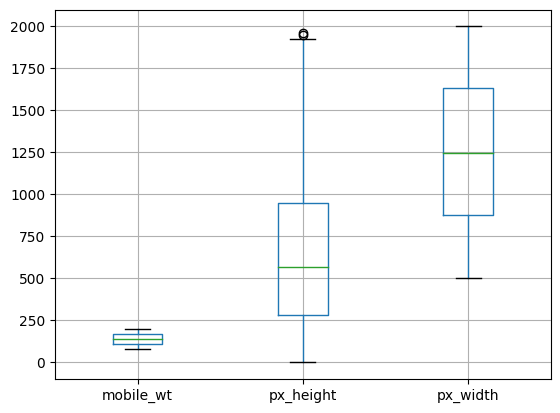

In [38]:
#Check Outliers
boxplot = df.boxplot(column=['mobile_wt','px_height','px_width'])

In [39]:
#Calculate Mean for mobile_wt and px_width
print(np.mean(df['mobile_wt']))
print(np.mean(df['px_width']))

140.35373808329152
1250.8853279919879


Impute Missing Value Numerical Data

In [40]:
#Impute missing value with mean
df['mobile_wt'].fillna(140.35, inplace=True)
df['px_width'].fillna(1250.89, inplace=True)

In [41]:
df['px_height'].median()

564.0

In [42]:
#Impute missing value with mean
df['px_height'].fillna(564, inplace=True)

Impute Missing Value - Categorical Data

In [43]:
#Find mode of Data Value
import statistics as st

In [44]:
print(st.mode(df['blue']))

FALSE


In [45]:
#Impute missing value with mode
df['blue'].fillna('FALSE', inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1999 non-null   int64  
 1   blue           1999 non-null   object 
 2   clock_speed    1999 non-null   float64
 3   dual_sim       1999 non-null   int64  
 4   fc             1999 non-null   int64  
 5   four_g         1999 non-null   int64  
 6   int_memory     1999 non-null   int64  
 7   m_dep          1999 non-null   float64
 8   mobile_wt      1999 non-null   float64
 9   n_cores        1999 non-null   object 
 10  pc             1999 non-null   int64  
 11  px_height      1999 non-null   float64
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   int32  
 14  sc_h           1999 non-null   int64  
 15  sc_w           1999 non-null   int64  
 16  talk_time      1999 non-null   int64  
 17  three_g        1999 non-null   int64  
 18  touch_sc

Feature Engineering

In [47]:
#Binary Encoding Categorical to integer
df_encode={"blue": {"TRUE":1,"FALSE" :0}}
df=df.replace(df_encode)

In [48]:
#Binary Encoding Boolean to integer
df['wifi'] = np.multiply(df['wifi'], 1)

In [49]:
df['n_cores']=df['n_cores'].astype(str).astype(int)

In [50]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188.0,2,...,20.0,756.0,2549,9,7,19,0,0,1,600
1,1021,1,0.5,1,0,1,53,0.7,136.0,3,...,905.0,1988.0,2631,17,3,7,1,1,0,823
2,563,1,0.5,1,2,1,41,0.9,145.0,5,...,1263.0,1716.0,2603,11,2,9,1,1,0,849
3,615,1,2.5,0,0,0,10,0.8,131.0,6,...,1216.0,1786.0,2769,16,8,11,1,0,0,802
4,1821,1,1.2,0,13,1,44,0.6,141.0,2,...,1208.0,1212.0,1411,8,2,15,1,1,0,584


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1999 non-null   int64  
 1   blue           1999 non-null   int64  
 2   clock_speed    1999 non-null   float64
 3   dual_sim       1999 non-null   int64  
 4   fc             1999 non-null   int64  
 5   four_g         1999 non-null   int64  
 6   int_memory     1999 non-null   int64  
 7   m_dep          1999 non-null   float64
 8   mobile_wt      1999 non-null   float64
 9   n_cores        1999 non-null   int32  
 10  pc             1999 non-null   int64  
 11  px_height      1999 non-null   float64
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   int32  
 14  sc_h           1999 non-null   int64  
 15  sc_w           1999 non-null   int64  
 16  talk_time      1999 non-null   int64  
 17  three_g        1999 non-null   int64  
 18  touch_sc

Model

In [52]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [53]:
#Target Price Range
input_df=df.drop('price_range',axis=1)
output_df=df['price_range']

In [54]:
input_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188.0,2,2,20.0,756.0,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136.0,3,6,905.0,1988.0,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145.0,5,6,1263.0,1716.0,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131.0,6,9,1216.0,1786.0,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141.0,2,14,1208.0,1212.0,1411,8,2,15,1,1,0


In [55]:
output_df.head()

0    600
1    823
2    849
3    802
4    584
Name: price_range, dtype: int64

Train Data as Input_df and Testing Data as Output_df (Ratio Train : Test = 80:20)

In [56]:
#Split Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df,output_df, test_size=0.2)

In [57]:
#training regression
from sklearn.tree import DecisionTreeRegressor

DT_regression = DecisionTreeRegressor()
DT_regression.fit(x_train, y_train)

DecisionTreeRegressor()

In [58]:
#testing
y_predict=DT_regression.predict(x_test)

In [59]:
#calculate error for training and testing
from sklearn import metrics
from sklearn.metrics import r2_score
print("R2: ",r2_score(y_predict,y_test))
print("error_test: ",metrics.mean_absolute_error(y_predict,y_test))

R2:  0.8195204535226903
error_test:  74.5075


In [72]:
class_names = output_df.unique().astype(str).tolist()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

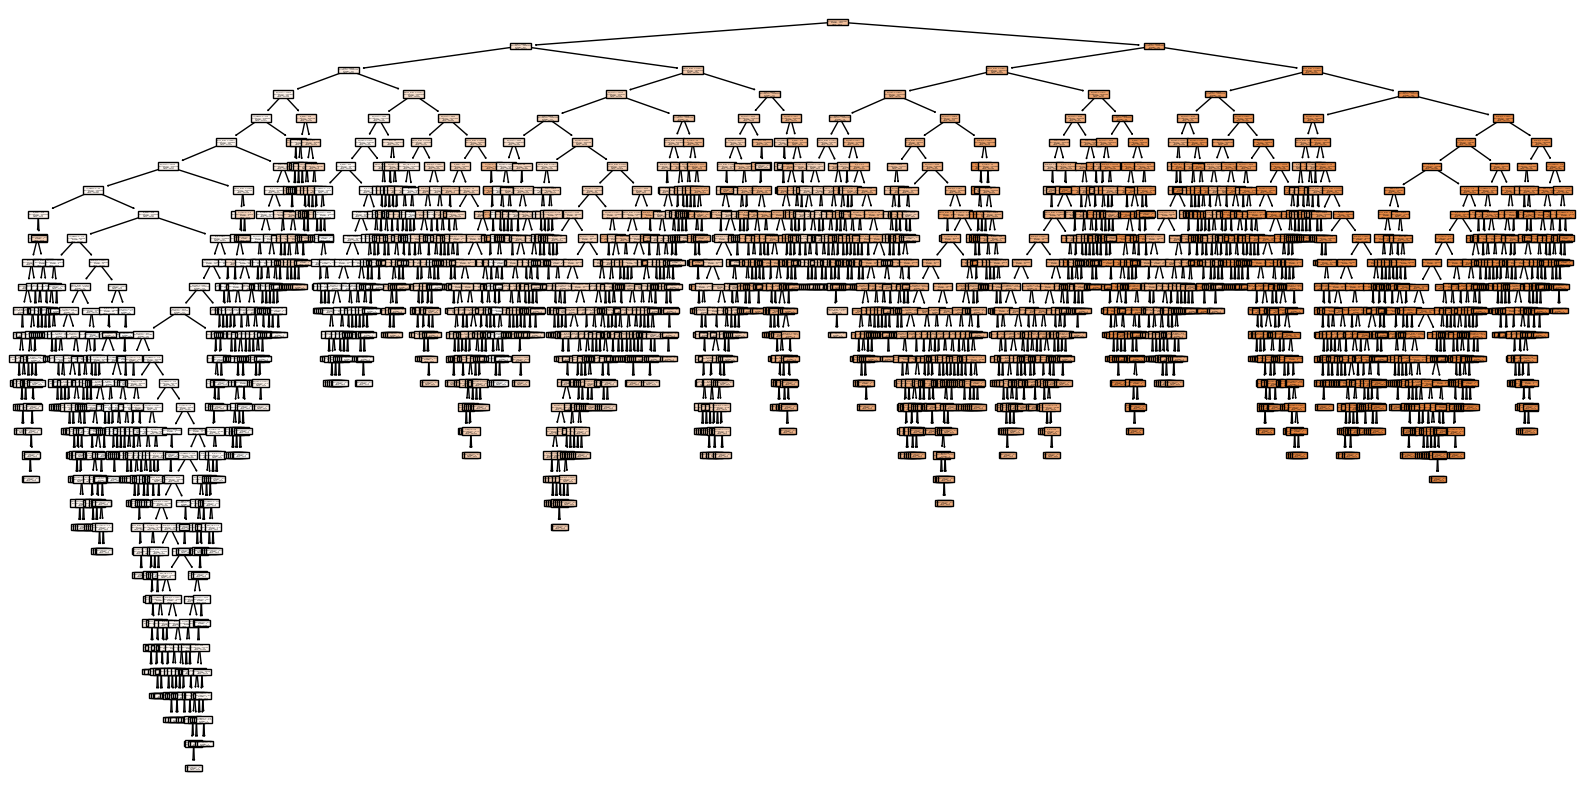

In [73]:
feature_names = input_df.columns.tolist()

plt.figure(figsize=(20, 10))
tree.plot_tree(DT_regression, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()
